In [1]:
import wrangle as w

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = w.get_data()

In [4]:
train, val, test = w.train_validate_test(df, 'diabetic')

In [5]:
train.shape, val.shape, test.shape

((429, 9), (185, 9), (154, 9))

# Explore

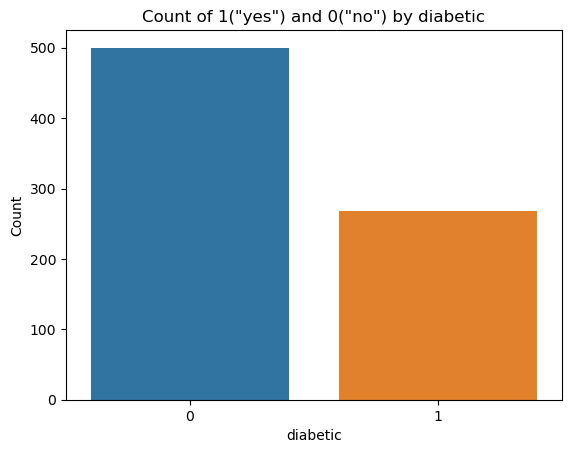

In [7]:

# create a bar plot
sns.countplot(x='diabetic', data=df)

# add axis labels and title
plt.xlabel('diabetic')
plt.ylabel('Count')
plt.title('Count of 1("yes") and 0("no") by diabetic')

# show the plot
plt.show()


- more without diabetes than with

### Distributions of features



In [9]:
train.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'diabetic'],
      dtype='object')

In [21]:
train.age.min(), train.age.max()

(21, 70)

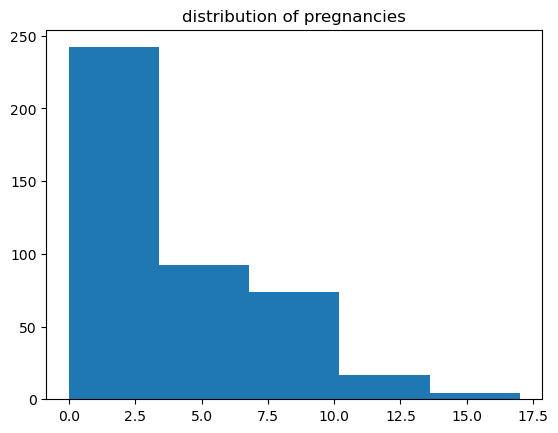

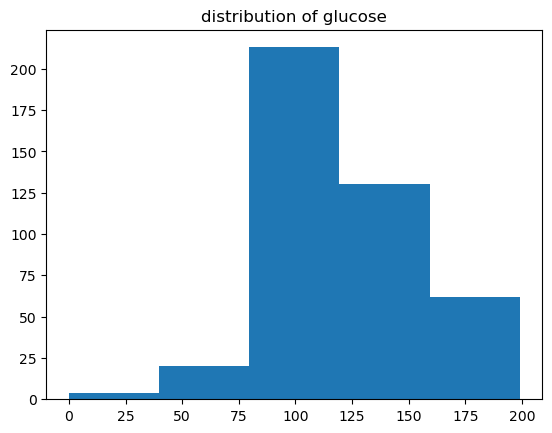

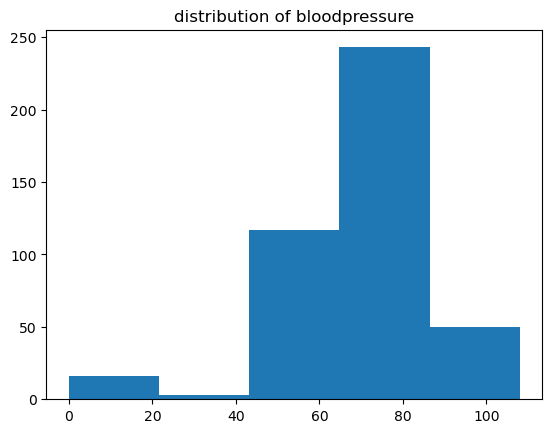

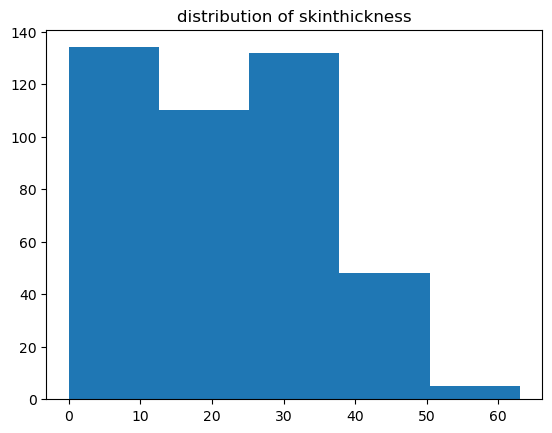

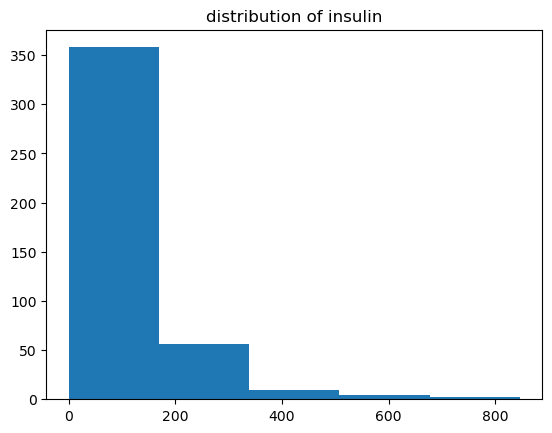

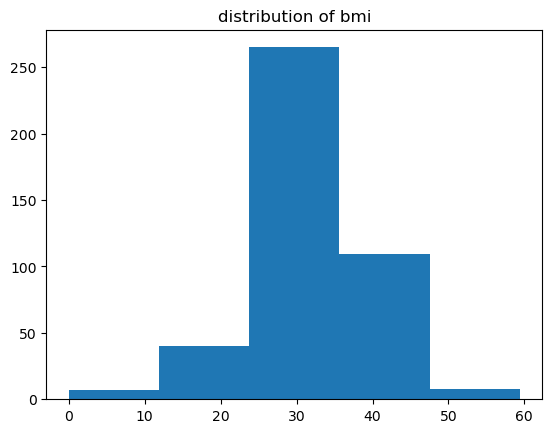

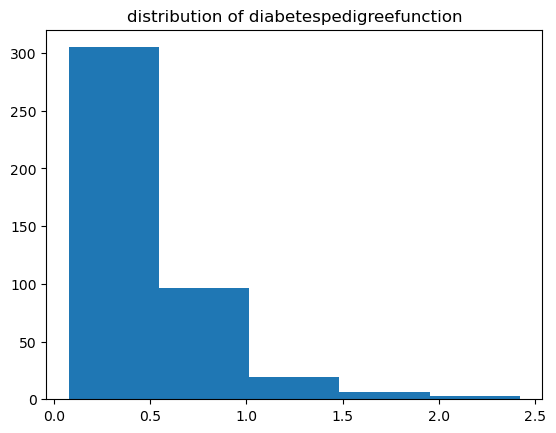

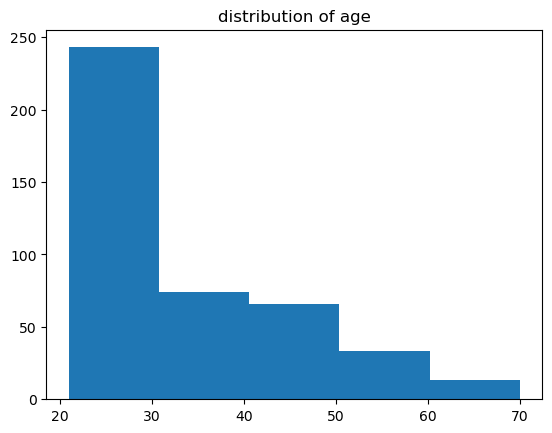

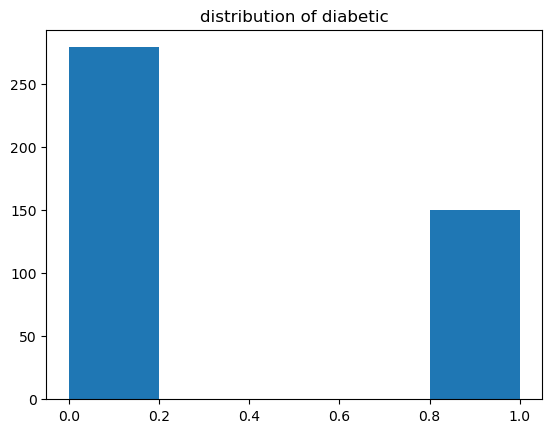

In [10]:
for col in df.columns:
    train[col].hist(bins=5, grid=False)
    plt.title(f'distribution of {col}')
    plt.show()

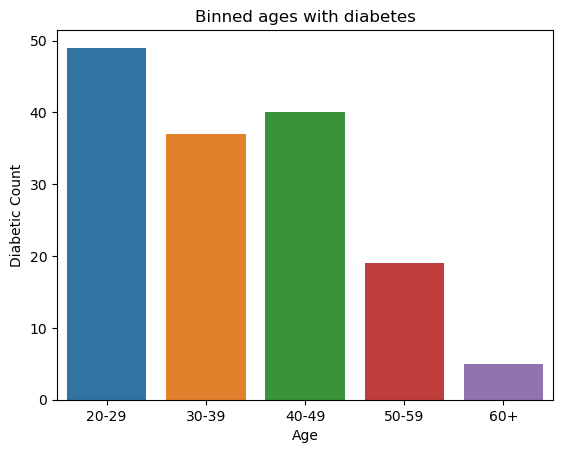

In [62]:
# bin the ages into intervals of 10 years
bins = [19, 29, 39, 49, 59, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60+']
train['age_bin'] = pd.cut(train['age'], bins=bins, labels=labels)

# count the number of occurrences of each bin
diabetic_count = train[train['diabetic'] == 1].groupby('age_bin')['diabetic'].count()

# create a bar plot
sns.barplot(x=diabetic_count.index, y=diabetic_count)

# add axis labels and title
plt.xlabel('Age')
plt.ylabel('Diabetic Count')
plt.title('Binned ages with diabetes')

# show the plot
plt.show()

In [71]:
train.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'diabetic', 'age_bin'],
      dtype='object')

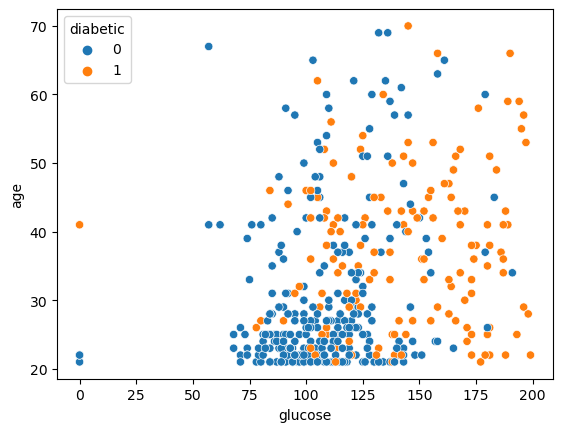

In [73]:
sns.scatterplot(data=train, x='glucose', y='age', hue='diabetic')
plt.show()